<div align = "center">
<h1 > DIMENSIONALITY REDUCTION METHODS </h1>
<h2> Jaouad Safouani </h2>
</div>

<h3> Scenario 1 </h3>

One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term.

You are an analyst for a telecommunications company that wants to better understand the characteristics of its customers. You have been asked to use principal component analysis (PCA) to analyze customer data to identify the principal variables of your customers, ultimately allowing better business and strategic decision-making.

* [A1:PROPOSAL OF QUESTION](#A1)
* [A2:DEFINED GOAL](#A2)
* [B1:EXPLANATION OF PCA](#B1)
* [B2:PCA ASSUMPTION](#B2) 
* [B3:PACKAGES OR LIBRARIES LIST](#B3)
* [C1:CONTINUOUS DATASET VARIABLES](#C1) 
* [C2:STANDARDIZATION OF DATASET VARIABLES](#C2)
* [D1:PRINCIPAL COMPONENTS](#D1) 
* [D2:IDENTIFICATION OF TOTAL NUMBER OF COMPONENTS](#D2)
* [D3:TOTAL VARIANCE OF COMPONENTS](#D3) 
* [D4:TOTAL VARIANCE CAPTURED BY COMPONENTS](#D4)
* [D5:SUMMARY OF DATA ANALYSIS](#D5) 
* [E:SOURCES FOR THIRD-PARTY CODE](#E) 
* [H:SOURCES](#H)

<h2> <a id="A1"> A1:PROPOSAL OF QUESTION  </a> </h2>

As an analyst at the WGU Telecommunications, I was asked to reduce the dimentionalty od the data using principal component algorithm. These would help the business to get a better understanding of the churned customers.

<h2> <a id="A1"> A2:DEFINED GOAL  </a> </h2>

The marketing and cutsomer relation departements would like to be able to predict customers that are high likey to churn with some measure of confidence. Therefore, PCA will help reduce the dimentionaly of the data and combine the variables into principal components. We will use the scree plot to choose the most important principal components that explain the churn data.

<h2> <a id="A1"> B1:EXPLANATION OF PCA  </a> </h2>

Principal component analysis is an algorithm that reduces the dimentionaly of the data and keeps the feature importance almost intact ( with minimal information loss). The variance of each component can be visualized in graph as scree plot. The Scree plot helps on identiying the the most important princpial components. We can visualize the reduced data to get better understanding of the data. We can also use the reduced data in machine learning. In fact, reduced data helps training machine learning a great deal. In real world scenarios PCA is usually used within piplines for training models. 

<h2> <a id="A1"> B2:PCA ASSUMPTION </a> </h2>

Mueller explained in his paper that large variances have important dynamics Assumes that components with larger variance correspond to interesting dynamics and lower ones correspond to noise. This means Princpal component analysis helps on reducing the dimentionalty, and the variance of each PC can be used to determine the importance of the PC. The greater the variance the important the PC is. In the other hand the lower the variance the less important the PC in expalaining the data. Therefore, PCs with lower variance can be ignored in the analysis.

<h3> Code  </h3>

In [1]:
#importing libraries
import pandas as pd 
# display all columns in the dataframe.
pd.set_option('max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('churn_clean.csv')

In [4]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
print(sorted(list(df.columns)))

['Age', 'Area', 'Bandwidth_GB_Year', 'CaseOrder', 'Children', 'Churn', 'City', 'Contacts', 'Contract', 'County', 'Customer_id', 'DeviceProtection', 'Email', 'Gender', 'Income', 'Interaction', 'InternetService', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Job', 'Lat', 'Lng', 'Marital', 'MonthlyCharge', 'Multiple', 'OnlineBackup', 'OnlineSecurity', 'Outage_sec_perweek', 'PaperlessBilling', 'PaymentMethod', 'Phone', 'Population', 'Port_modem', 'State', 'StreamingMovies', 'StreamingTV', 'Tablet', 'TechSupport', 'Techie', 'Tenure', 'TimeZone', 'UID', 'Yearly_equip_failure', 'Zip']


In [6]:
df.shape

(10000, 50)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

There are no missing values in the dataset.

In [8]:
df.drop( columns=['CaseOrder', 'Zip','Lat','Lng','UID','CaseOrder','Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], inplace=True)

In [9]:
print(sorted(list(df.columns)))

['Age', 'Area', 'Bandwidth_GB_Year', 'Children', 'Churn', 'City', 'Contacts', 'Contract', 'County', 'Customer_id', 'DeviceProtection', 'Email', 'Gender', 'Income', 'Interaction', 'InternetService', 'Job', 'Marital', 'MonthlyCharge', 'Multiple', 'OnlineBackup', 'OnlineSecurity', 'Outage_sec_perweek', 'PaperlessBilling', 'PaymentMethod', 'Phone', 'Population', 'Port_modem', 'State', 'StreamingMovies', 'StreamingTV', 'Tablet', 'TechSupport', 'Techie', 'Tenure', 'TimeZone', 'Yearly_equip_failure']


In [10]:
df.duplicated().sum()

0

In [11]:
# create a dictionary with columns and their datatype. 
dict_col_type = dict()
for col in list(df.columns):
    dict_col_type[col] = df[col].dtypes
df_numeric_variable= dict()
for i, v in dict_col_type.items():
    if (dict_col_type[i]=='int64' or dict_col_type[i]=='float64'):
        df_numeric_variable[i]= v

In [12]:
df_numeric_variable

{'Population': dtype('int64'),
 'Children': dtype('int64'),
 'Age': dtype('int64'),
 'Income': dtype('float64'),
 'Outage_sec_perweek': dtype('float64'),
 'Email': dtype('int64'),
 'Contacts': dtype('int64'),
 'Yearly_equip_failure': dtype('int64'),
 'Tenure': dtype('float64'),
 'MonthlyCharge': dtype('float64'),
 'Bandwidth_GB_Year': dtype('float64')}

In [13]:
df = df[list(df_numeric_variable.keys())]

In [14]:
df.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436


In [15]:
print(list(df.columns))

['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']


<h2> <a id="A1"> C1:CONTINUOUS DATASET VARIABLES </a> </h2>

*	Children: Number of children in customer’s household as reported in sign up information (may not be children of customer)
*	Age: Age of customer as reported in sign-up information
*	Outage_sec_perweek: Average number of seconds per week of system outages in the customer’s neighborhood
*	Email:Number of emails sent to the customer in the last year (marketing or correspondence)
*	Contacts:Number of times customer contacted technical support (or if a new customer, similar customer contacts in the new customer’s profile)
*	Yearly_equip_failure:The number of times customer’s equipment failed and had to be reset/replaced in the past year (or if new customer, similar failures as seen in the new customer’s profile) 
*	Tenure: Number of months the customer has stayed with the provider
*	MonthlyCharge: The amount charged to the customer monthly. This value reflects an average per customer. For brand new customers, this value is the average for other customers who fit the new customer’s profile
*	Income: Annual income of customer (or invoiced person) as reported at time of sign-up
*   Population: Population within a mile radius of customer, based on census data

<h2> <a id="A1"> C2:STANDARDIZATION OF DATASET VARIABLES </a> </h2>

In [17]:
scaler = StandardScaler()
scaled_aray = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_aray, columns = df.columns)
df_scaled.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.673405,-0.972338,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487
1,0.047772,-0.506592,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876
2,-0.417238,0.890646,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138
3,0.284537,-0.506592,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857
4,0.110549,-0.972338,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184


In [19]:
# make a copy to csv of the prepared data.
df_scaled.to_csv("prepared_churn_clean.csv")

<h2> <a id="A1"> D1:PRINCIPAL COMPONENTS </a> </h2>

In [20]:
# Covarience matrix
df.cov()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
Population,2.083028e+08,-182.122835,3148.211329,-3.515915e+06,235.517521,784.414443,57.332595,-41.146350,-1358.440976,-2961.501031,-1.230624e+05
Children,-1.821228e+02,4.610470,-1.321408,6.020182e+02,0.012073,0.029100,-0.044096,0.009996,-0.289078,-0.901918,1.200508e+02
Age,3.148211e+03,-1.321408,428.443698,-2.387712e+03,-0.495680,0.099456,0.308286,0.112908,9.293466,9.536295,-6.659971e+02
Income,-3.515915e+06,602.018213,-2387.711823,7.952353e+08,-840.119964,-790.796214,34.374980,97.260097,1576.666894,-3649.886509,2.263830e+05
Outage_sec_perweek,2.355175e+02,0.012073,-0.495680,-8.401200e+02,8.856690,0.035964,0.044395,0.005505,0.230731,2.619387,2.715633e+01
Email,7.844144e+02,0.029100,0.099456,-7.907962e+02,0.035964,9.156060,0.009094,-0.031471,-1.157633,0.259435,-9.640432e+01
Contacts,5.733260e+01,-0.044096,0.308286,3.437498e+01,0.044395,0.009094,0.977064,-0.003792,0.073712,0.180770,7.125536e+00
Yearly_equip_failure,-4.114635e+01,0.009996,0.112908,9.726010e+01,0.005505,-0.031471,-0.003792,0.404436,0.209112,-0.195873,1.672377e+01
Tenure,-1.358441e+03,-0.289078,9.293466,1.576667e+03,0.230731,-1.157633,0.073712,0.209112,699.235561,-3.789105,5.729443e+04
MonthlyCharge,-2.961501e+03,-0.901918,9.536295,-3.649887e+03,2.619387,0.259435,0.180770,-0.195873,-3.789105,1844.109332,5.668740e+03


In [21]:
number_columns = len(df.columns) 
column_names = ['PC'+ str(i + 1) for i in range(number_columns)]
pca = PCA(n_components=number_columns)
PCs = pca.fit_transform(df_scaled)
df_pcs = pd.DataFrame(data = PCs, columns = column_names)
df_pcs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.532639,0.119512,-1.562116,0.136206,0.414997,-1.399578,0.191106,-0.130913,-0.527627,0.045657,-0.026622
1,-1.659019,0.130539,0.638301,-1.375658,0.723705,-1.271899,0.575596,0.474031,-0.826669,1.302704,-0.038360
2,-0.900522,1.191402,-0.193081,-0.495760,1.308798,-1.158699,-0.434070,-0.004835,0.466449,-0.297649,0.060825
3,-0.942314,-1.138090,1.264619,0.039044,0.394403,0.898011,-1.516688,-0.434394,-0.730167,-0.734906,0.130009
4,-1.929748,-1.434578,-0.984405,1.102943,0.459296,0.611698,0.333212,-1.448501,-0.347708,0.279139,-0.056541
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.897402,0.789544,0.484892,-0.372859,-1.157516,1.016570,-0.920543,-0.197212,0.091115,0.591052,0.081237
9996,1.434856,-1.508304,2.101618,2.366782,0.867436,1.420222,1.171667,2.015353,1.829908,1.784128,-0.026353
9997,0.578813,0.799305,-0.693559,0.471070,-1.131182,-1.009988,-0.023901,0.482031,-0.303914,0.032670,-0.086949
9998,2.002781,-1.589854,1.860081,-0.311399,0.216009,-0.461117,0.605280,1.201074,-0.039065,1.045767,-0.069400


<h2> <a id="A1"> D2:IDENTIFICATION OF TOTAL NUMBER OF COMPONENTS </a> </h2>

In [22]:
print( 'There are', pca.n_components_,'components')

There are 11 components


<h4 style="color:#296eaa;"> SCREE PLOT </h4>

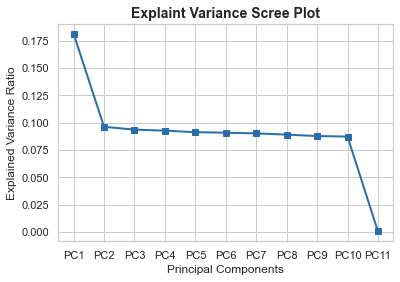

In [316]:
plt.plot(column_names, pca.explained_variance_ratio_, 's-', linewidth=2, color='#296eaa')
plt.title('Explaint Variance Scree Plot',fontsize =14, font ='arial', fontweight ='bold')
plt.xlabel('Principal Components',fontsize =12, font ='arial', fontweight ='light')
plt.ylabel('Explained Variance Ratio',fontsize =12, font ='arial', fontweight ='light')
plt.show()

<h4 style="color:#296eaa;"> SCREE PLOT CUMMULATIVE VARIANCE </h4>

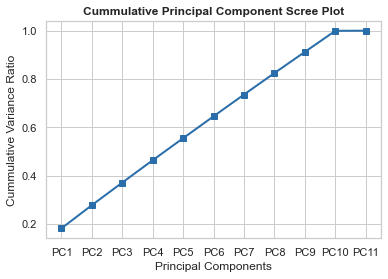

In [318]:
cummulative_variance = np.cumsum(pca.explained_variance_ratio_)  
plt.plot(column_names, cummulative_variance, 's-', linewidth=2, color='#296eaa')
plt.title('Cummulative Principal Component Scree Plot',fontsize =12, font ='arial', fontweight ='bold')
plt.xlabel('Principal Components',fontsize =12, font ='arial', fontweight ='light')
plt.ylabel('Cummulative Variance Ratio',fontsize =12, font ='arial', fontweight ='light')
plt.show()

We can clearly see that the principal components form PC1 to PC10 explain over 99 percent of data, we can ignore PC11 in our analysis and we will still get good results with minimum information loss.

<h2> <a id="A1"> D3:TOTAL VARIANCE OF COMPONENTS </a> </h2>

In [306]:
pd.DataFrame(zip(column_names, np.round(pca.explained_variance_ratio_ * 100,2)),
             columns =['PC','Explained Variance Ratio'])

,PC,Explained Variance Ratio
0,PC1,18.13
1,PC2,9.61
2,PC3,9.36
3,PC4,9.26
4,PC5,9.12
5,PC6,9.07
6,PC7,9.01
7,PC8,8.90
8,PC9,8.76
9,PC10,8.72


<h2> <a id="A1"> D4:TOTAL VARIANCE CAPTURED BY COMPONENTS </a> </h2>

In [307]:
pc_ratio = pd.DataFrame(zip(column_names,pca.explained_variance_ratio_*100), columns =['PC','explained_variance_ratio_'])
best_pc = str(round(pc_ratio[pc_ratio['explained_variance_ratio_'] >=1]['explained_variance_ratio_'].sum(),2))
print('The first' , str(len(pc_ratio[pc_ratio['explained_variance_ratio_'] >=1]['PC'])),
      'PCs explain', best_pc , 'percent of the data')

The first 10 PCs explain 99.95 percent of the data


<h2> <a id="A1"> D1:OUTPUT AND INTERMEDIATE CALCULATIONS </a> </h2>

In [308]:
#create loading of PCs
loadings = pd.DataFrame(pca.components_.T, columns=column_names, index=df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,-0.006007,-0.275637,0.267636,0.422474,0.394930,0.243871,0.175784,0.614035,0.138379,0.177040,-0.000347
Children,0.014172,0.517059,0.343248,-0.076204,0.164533,0.164376,0.180459,-0.184798,0.672256,-0.188740,-0.021587
Age,0.001643,-0.457819,-0.418590,0.198972,0.126614,-0.087791,0.343081,-0.203859,0.273259,-0.563400,0.022369
Income,0.004414,0.254938,-0.268952,-0.077133,-0.318506,0.641985,0.484459,0.182477,-0.254842,-0.100837,-0.000938
Outage_sec_perweek,0.005850,-0.212600,0.336483,-0.587558,0.345667,0.197563,-0.116979,0.098387,-0.285041,-0.482900,0.000283
Email,-0.020887,-0.195432,0.526029,0.311468,-0.045059,0.135906,0.308044,-0.597955,-0.325796,0.092556,0.000252
Contacts,0.004148,-0.427624,-0.107344,-0.162242,-0.123928,0.587837,-0.376069,-0.245083,0.366164,0.287739,-0.000941
Yearly_equip_failure,0.017593,0.169549,-0.385120,-0.135015,0.729850,0.071878,0.158048,-0.277655,-0.159744,0.372774,-0.000097
Tenure,0.705405,-0.006554,-0.007865,0.048500,0.000291,0.009174,-0.030141,-0.007482,-0.027041,-0.027774,-0.705263
MonthlyCharge,0.040448,-0.294988,0.112548,-0.530093,-0.172686,-0.292148,0.555192,0.097520,0.203935,0.375603,-0.045756


<h2> <a id="A1"> D5:SUMMARY OF DATA ANALYSIS </a> </h2>

From loading the princpal components we can clearly see that it works well with highly correlated features. we conlude the following what features affect each princpial component.
* PC1 is greatly affected by positively Tenure and Bandwidth_GB_Year
* PC2 is affected by negatively Age, positively Children and Outage_sec_perweek for the most part.
* PC3 is affected by Population, Children, Age, Income, Email and Yearly_equip_failure for most part.
* PC4 is affected positively by Population, negatively Outage_sec_perweek, negatively MonthlyCharge.
* PC5 is affected positively by Population, positevely Outage_sec_perweek, positively Yearly_equip_failure.
* PC6 is affected positively by Population, Income, Contacts, Yearly_equip_failure and negateively by MonthlyCharge.
* PC7 is affected positively by Age, Income, Email, MonthlyCharge, and negatively by Contacts.
* PC8 is affected positively by Population, and negatively by Email.
* PC9 is affected positively by Children, Age, Contacts and negatively by Income.
* PC10 is affected positively by MonthlyCharge, Yearly_equip_failure, Contacts and negatively by Age, Outage_sec_perweek.
* PC11 is affected positively by Bandwidth_GB_Year, and negatively by Tenure.

PCA shows the feature importance in explaining the data. We were able to reduce the dimensionalty using the elbow technique with scree plot from 11 features 10 principal component with minimal information loss. The explained Vaiance ratio shows how much informaiton can be attributed to a princpial component.by using the Cummulative Scree Plot we were able to conclude that the first 10 principal components explain <b>% 99.95</b> of the data. 
We can practicly use the principal components to train machine learning algorithms such as in classification, regression and even in unsupervised machine learning. Therefore, we benefit from training models faster and better models with minimal information loss.

<h2> <a id="A1"> F:PANOPTO RECORDING </a> </h2>

[Link to Panopto Video](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6d5272af-5ed9-4cc4-9ed7-ae84005ae39d)

<h2> <a id="A1"> G:SOURCES FOR THIRD-PARTY CODE </a> </h2>

None

<h2> <a id="A1"> H:SOURCES </a> </h2>

mueller . <https://www3.cs.stonybrook.edu/~mueller/teaching/cse564/Lec%2017%20-%20Principal%20Component%20Analysis.pdf>